In [60]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np

In [61]:
data = pd.read_excel('../PredykcjaSmogu/zanieczyszczenia/PM10/2004_PM10_24g.xlsx')
# skip information
data = data.drop(index=[0,1], axis=0)
data = data.reset_index(drop=True)

In [62]:
# example
display(data)

,Kod stacji,DsBialka,DsGlogNorwArch,DsJelw05,DsJgGrottgeraPM,DsJgGrottgeraPMArch,DsLegMick,DsLegRzeczA,DsLegSmok,DsLegZlotor,...,WpOstrowWlkpPM10,WpPila5710111,WpPoznan63117,WpPoznanPM10szpital,WpPoznanSzymanowskiego17,WpWKP008,ZpGryfWiduchowa003,ZpKoszalinWSSE,ZpSwinoujscieWSSE,ZpSzczecinWSSE
0,2004-01-01 00:00:00,NaN,NaN,7.667,NaN,NaN,15,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.4,NaN,NaN,NaN
1,2004-01-02 00:00:00,NaN,NaN,5.875,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,29.9,NaN,NaN,NaN
2,2004-01-03 00:00:00,NaN,NaN,4.417,NaN,NaN,26,NaN,NaN,NaN,...,NaN,NaN,62,NaN,NaN,NaN,34.5,NaN,NaN,NaN
3,2004-01-04 00:00:00,NaN,NaN,9.875,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,112,NaN,NaN,NaN,30,NaN,NaN,NaN
4,2004-01-05 00:00:00,87.1,NaN,25.333,NaN,NaN,89,NaN,101.2,85.7,...,NaN,112,NaN,NaN,NaN,NaN,49.7,NaN,41,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2004-12-27 00:00:00,21.2,16,5.167,NaN,NaN,NaN,NaN,16.4,20.6,...,NaN,NaN,13,22,11,41,22.7,19,NaN,18
362,2004-12-28 00:00:00,31.8,NaN,7.208,NaN,NaN,NaN,NaN,22.4,30,...,NaN,NaN,0,41,35,83,3.8,21,NaN,25
363,2004-12-29 00:00:00,12.3,27,7,NaN,NaN,NaN,NaN,20,15.8,...,NaN,NaN,0,66,56,32,9.8,49,NaN,27
364,2004-12-30 00:00:00,NaN,NaN,6.167,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0,35,23,44,9.1,33,NaN,20


In [63]:
# only krakow's data
def krakow_filter(df):
    text = df.columns.to_list()
    regex = re.compile('^MpKrak.*')
    krakow = list(filter(regex.match, text))
    return krakow

Za mało danych dla NO2 i SO2.

In [5]:
# at first, separated df for each param (dict of df)
# the same column name -> adding data
# columns name meaning 

parameters = ['BaP(PM10)', 'PM2.5', 'PM10']
def data_load(skipr, dropr, start_year, end_year):
    df_dict = {parameters[0]: pd.DataFrame(), parameters[1]: pd.DataFrame(), parameters[2]: pd.DataFrame()}
    for p in parameters:
        for year in range(start_year, end_year):
            dir = '../PredykcjaSmogu/zanieczyszczenia/' + p + '/' + str(year) + '_' + p + '_24g.xlsx' 
            data = pd.read_excel(dir, skiprows=skipr)
            data = data.drop(index=dropr, axis=0)
            data[data.columns[0]] = pd.to_datetime(data[data.columns[0]])
            data = data.set_index(data.columns[0])
            data.index.name = 'data'
            krakow = krakow_filter(data)
            df_dict[p] = pd.concat([df_dict[p], data[krakow]])
        #display(df_dict[p])
    return df_dict


In [64]:
print(data_load(0, [0,1], 2004, 2016))


{'BaP(PM10)':            MpKrakowWIOSBulw6118 MpKrakowWIOSPrad6115 MpKrakowWIOSBuja6119  \
data                                                                        
2004-01-01                  NaN                  NaN                  NaN   
2004-01-02                  NaN                  NaN                  NaN   
2004-01-03                  NaN                  NaN                  NaN   
2004-01-04                  NaN                  NaN                  NaN   
2004-01-05                  NaN                  NaN                  NaN   
...                         ...                  ...                  ...   
2015-12-27                  NaN                  NaN                  NaN   
2015-12-28                  NaN                  NaN                  NaN   
2015-12-29                  NaN                  NaN                  NaN   
2015-12-30                  NaN                  NaN                  NaN   
2015-12-31                  NaN                  NaN          

In [65]:
def extract_data(df, station1, station2):
    temp = df[[station1, station2]]
    temp.loc[:, station1] = temp[station1].fillna(temp[station2])
    temp.loc[:, station2] = temp[station2].fillna(temp[station1])
    temp = temp.drop([station1], axis=1)
    return temp
    

In [66]:
dfs2016 = data_load(0, [0,1], 2004, 2016)
dfs2024 = data_load(1, [0,1,2,3], 2016, 2024)

In [96]:
# locations set
locations = set()
# diffrent names
locations2016 = set()
locations2024 = set()
for p in parameters:
    locations.update(dfs2016[p].columns.tolist())
    locations.update(dfs2024[p].columns.tolist())
    locations2016.update(dfs2016[p].columns.tolist())
    locations2024.update(dfs2024[p].columns.tolist())
print(locations)


{'MpKrakBujaka', 'MpKrakOsPias', 'MpKrakowWIOSBulw6118', 'MpKrakBulwar', 'MpKrakWadow', 'MpKrakAlKras', 'MpKrakowWIOSPrad6115', 'MpKrakZloRog', 'MpKrakowWIOSBuja6119', 'MpKrakTelime', 'MpKrakowWSSEPrad6102', 'MpKrakowWIOSAKra6117', 'MpKrakSwoszo'}


1. ul. Bujaka: 
    - MpKrakBujaka, MpKrakowWIOSBuja6119 
    - [Φ 50,010575 λ 19,949189]
    - Stacja na Kurdwanowie przy mniejszej ulicy
    - na ziemi 
2. os. Piastów: 
    - MpKrakOsPias
    - [Φ 50,098508 λ 20,018269]
    - przy liceum Salezjan 
    - na ziemi 
3. Bulwarowa: 
    - MpKrakowWIOSBulw6118, MpKrakBulwar
    - [Φ 50,069308 λ 20,053492]
    - zaraz przy al. Jana Pawła II
    - na ziemi 
4. os. Wadów:
    - MpKrakWadow
    - [Φ 50,100569 λ 20,122561]
    - nie przy drodze, przy podstawówce
    - na ziemi
5. Krasińskiego: 
    - MpKrakAlKras, MpKrakowWIOSAKra6117
    - [Φ 50,057678 λ 19,926189]
    - na osiedlu stacja, ale przy bardzo ruchliwej ulicy, około 24 budynek
    - na ziemi 
6. Prad(?): MpKrakowWIOSPrad6115, MpKrakowWSSEPrad6102
7. Złoty Róg: MpKrakZloRog
8. Telimeny: MpKrakTelime
9. Swoszowice: MpKrakSwoszo

Inny kod stacji w innych latach.

Jak duże są różnice w obrębie Krakowa?


Dostępne metadane

In [109]:
# global dataset
def dataset(parameter):
    # locations set
    locations = set()
    locations.update(dfs2016[parameter].columns.tolist())
    locations.update(dfs2024[parameter].columns.tolist())
    # combined df
    # unpacking args (effective)
    df = pd.DataFrame(columns = [* locations], index=dfs2016[parameter].index.union(dfs2024[parameter].index))
    
    for location in locations:
        try:
            df[location] = dfs2016[parameter][location]
        except KeyError:
            pass
        try:
            df[location] = dfs2024[parameter][location]
        except KeyError:
            pass
    return df
    

In [110]:
# not all locations 
dfBaP = dataset('BaP(PM10)')
dfPM10 = dataset('PM10')
dfPM25 = dataset('PM2.5')

C:\Users\PC\git\AI\PredykcjaSmogu\.venv\Lib\site-packages\pandas\plotting\_matplotlib\core.py:981: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  return ax.plot(*args, **kwds)
C:\Users\PC\git\AI\PredykcjaSmogu\.venv\Lib\site-packages\pandas\plotting\_matplotlib\core.py:981: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  return ax.plot(*args, **kwds)
C:\Users\PC\git\AI\PredykcjaSmogu\.venv\Lib\site-packages\pandas\plotting\_matplotlib\core.py:981: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  return ax.plot(*args, **kwds)
C:\Users\PC\git\AI\PredykcjaSmogu\.venv\Lib\site-packages\pandas\plotting\_matplotlib\core.py:981: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  return ax.plot(*args, **kwds)
C:\Users\PC\git\AI\PredykcjaSmogu\.venv\Lib\site

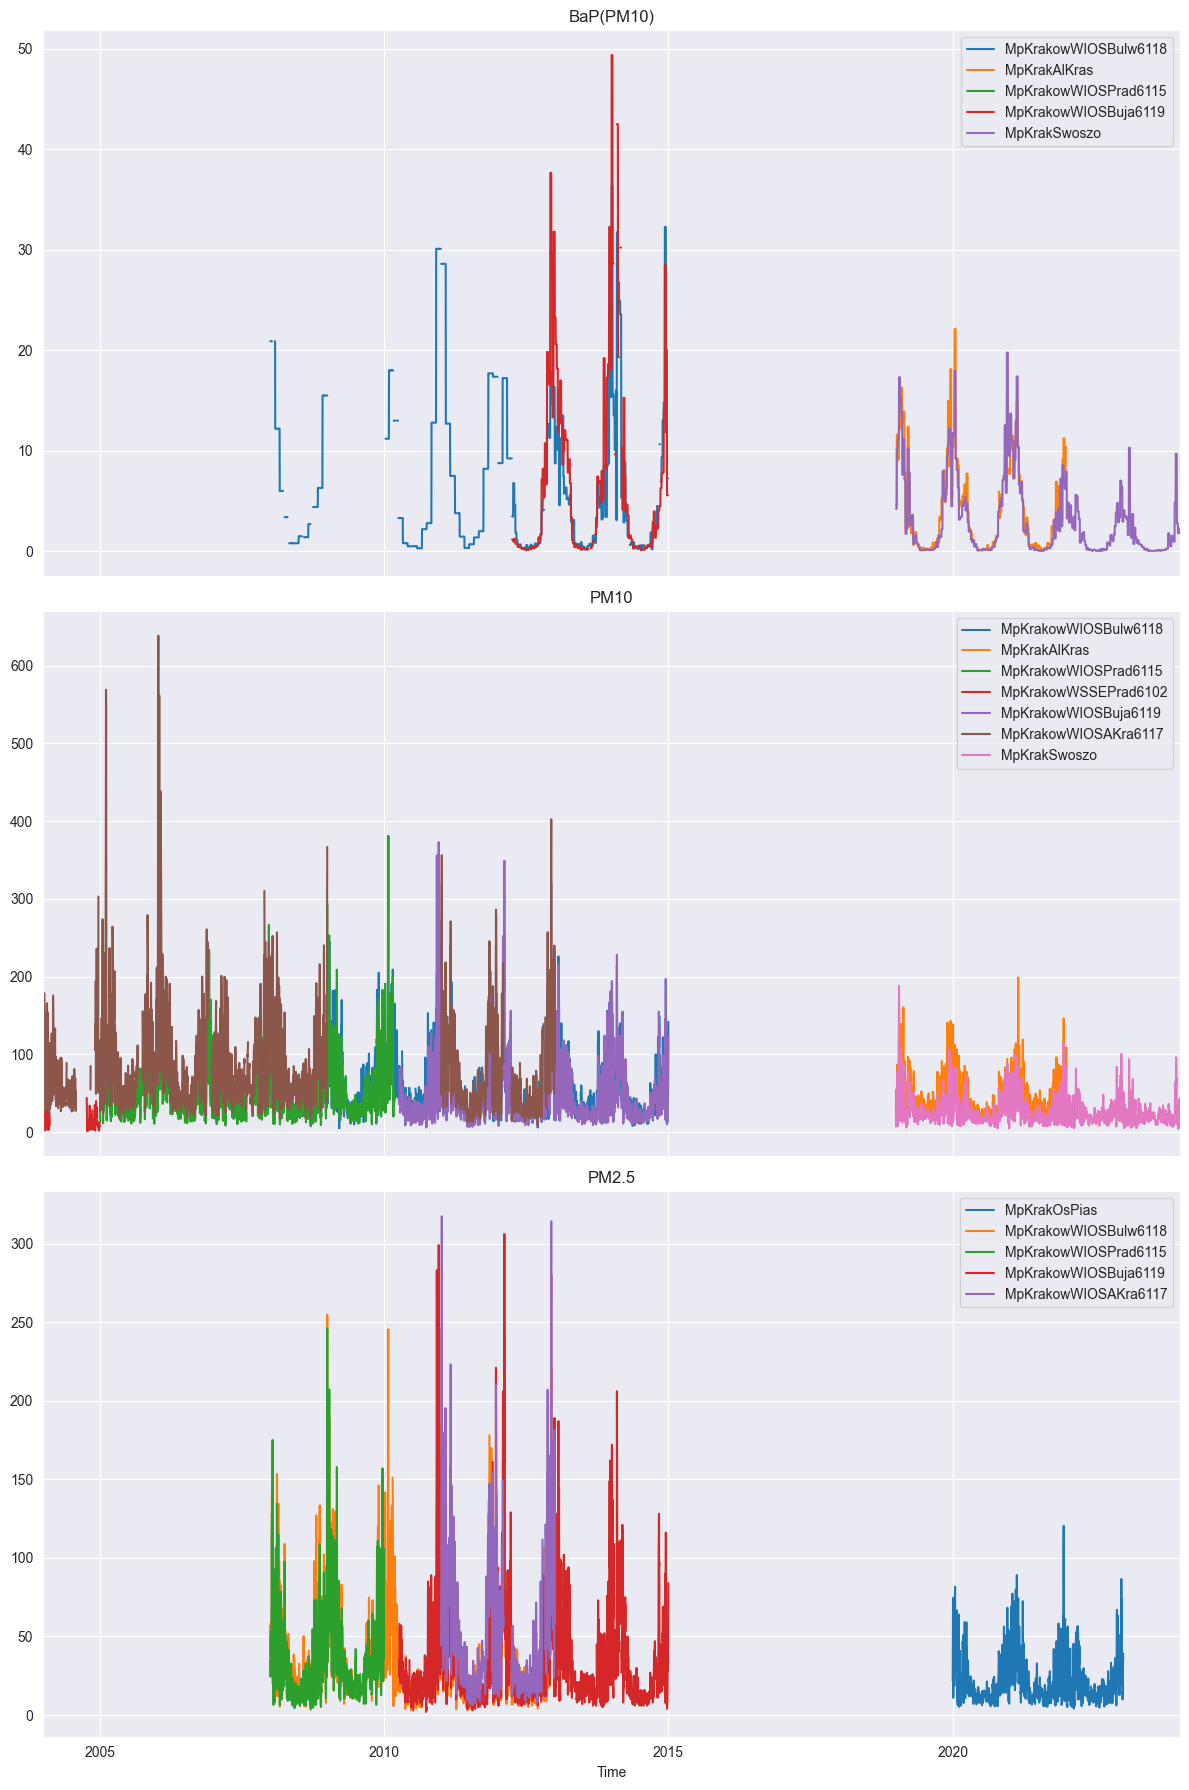

In [130]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 1, figsize=(12, 18), sharex=True)

# # df.plot method works with NA (plt doesn't)
dfBaP.plot(ax=axes[0], title="BaP(PM10)")
dfPM10.plot(ax=axes[1], title="PM10")
dfPM25.plot(ax=axes[2], title="PM2.5")

axes[2].set_xlabel("Time")
plt.tight_layout()
plt.show()

# error - not all locations (MpKrakBujaka)

In [128]:
# fig, axes = plt.subplots(3, 1, figsize=(12, 18), sharex=True)
# 
# # dropna ?
# for column in dfBaP.columns:
#     axes[0].plot(dfBaP.index, dfBaP[column], label=column)
# axes[0].set_title("BaP(PM10) Over Time")
# axes[0].set_ylabel("BaP(PM10)")
# axes[0].legend()
# axes[0].grid()
# 
# for column in dfPM10.columns:
#     axes[1].plot(dfPM10.index, dfPM10[column], label=column)
# axes[1].set_title("PM10 Over Time")
# axes[1].set_ylabel("PM10")
# axes[1].legend()
# axes[1].grid()
# 
# for column in dfPM25.columns:
#     axes[2].plot(dfPM25.index, dfPM25[column], label=column)
# axes[2].set_title("PM2.5 Over Time")
# axes[2].set_xlabel("Time")
# axes[2].set_ylabel("PM2.5")
# axes[2].legend()
# axes[2].grid()
# 
# plt.tight_layout()
# plt.show()


# Starsza wersja do porównania

In [9]:
# diffrent method

df_dict2015 = {parameters[0]: pd.DataFrame(), parameters[1]: pd.DataFrame(), parameters[2]: pd.DataFrame()}
df_dict2024 = {parameters[0]: pd.DataFrame(), parameters[1]: pd.DataFrame(), parameters[2]: pd.DataFrame()}
# for p in parameters:
# together won't work - why
#     print(p)
#     df_dict2015[p] = extract_data(dfs2015[p], 'MpKrakowWIOSBuja6119', 'MpKrakBujaka')
#     df_dict2024[p] = dfs2024[p]['MpKrakBujaka']
    #df_dict2015[p] = pd.to_numeric(df_dict2015[p]['MpKrakBujaka'], errors='coerce') # errors='coerce' -> NaN
    #df_dict2024[p] = pd.to_numeric(df_dict2024[p]['MpKrakBujaka'], errors='coerce')
    #df_dict[p] = pd.concat([extract_data(dfs[p], 'MpKrakowWIOSBulw6118', 'MpKrakBulwar'), extract_data(dfs[p], 'MpKrakowWIOSBuja6119', 'MpKrakBujaka')])

In [17]:
for p in parameters:
    df_dict2015[p] = extract_data(dfs2016[p], 'MpKrakowWIOSBuja6119', 'MpKrakBujaka')
    df_dict2015[p]['MpKrakBujaka'] = pd.to_numeric(df_dict2015[p]['MpKrakBujaka'], errors='coerce')# errors='coerce' -> NaN

In [18]:
for p in parameters:
    df_dict2024[p] = pd.DataFrame(dfs2024[p]['MpKrakBujaka'])
    # 2024 series, 2015 df
    df_dict2024[p]['MpKrakBujaka']  = pd.to_numeric(df_dict2024[p]['MpKrakBujaka'], errors='coerce') # why key error -> series

In [19]:
df_BaP = pd.concat([df_dict2015[parameters[0]], df_dict2024[parameters[0]]])
df_PM25 = pd.concat([df_dict2015[parameters[1]], df_dict2024[parameters[1]]]) # PM2.5
df_PM10 = pd.concat([df_dict2015[parameters[2]], df_dict2024[parameters[2]]])

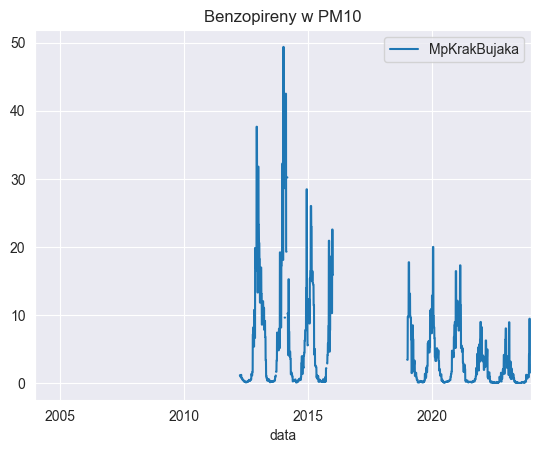

In [23]:
df_BaP.plot()
plt.title('Benzopireny w PM10')
plt.show() #2016-2019

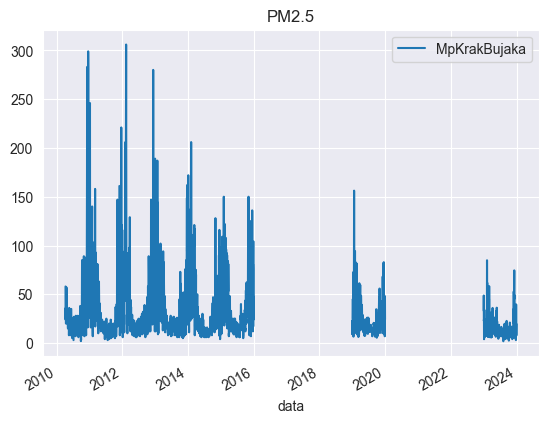

In [24]:
df_PM25.plot() #2016-2019, 2020-2023
plt.title('PM2.5')
plt.show() 

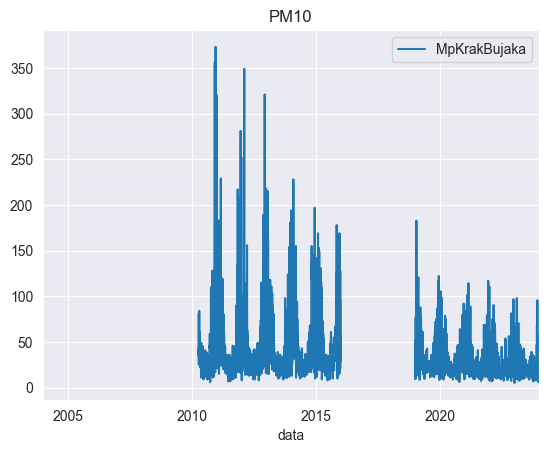

In [25]:
df_PM10.plot()
plt.title('PM10')
plt.show() #2016-2019 NaN

In [26]:
print(df_BaP.isnull().sum())
print(df_PM10.isnull().sum())
print(df_PM25.isnull().sum())

MpKrakBujaka    3863
dtype: int64
MpKrakBujaka    3485
dtype: int64
MpKrakBujaka    4523
dtype: int64


In [37]:
df_PM10.to_csv('Bujaka/PM10_Bujaka.csv')
df_PM25.to_csv('Bujaka/PM2.5_Bujaka.csv')
df_BaP.to_csv('Bujaka/BaP_Bujaka.csv')

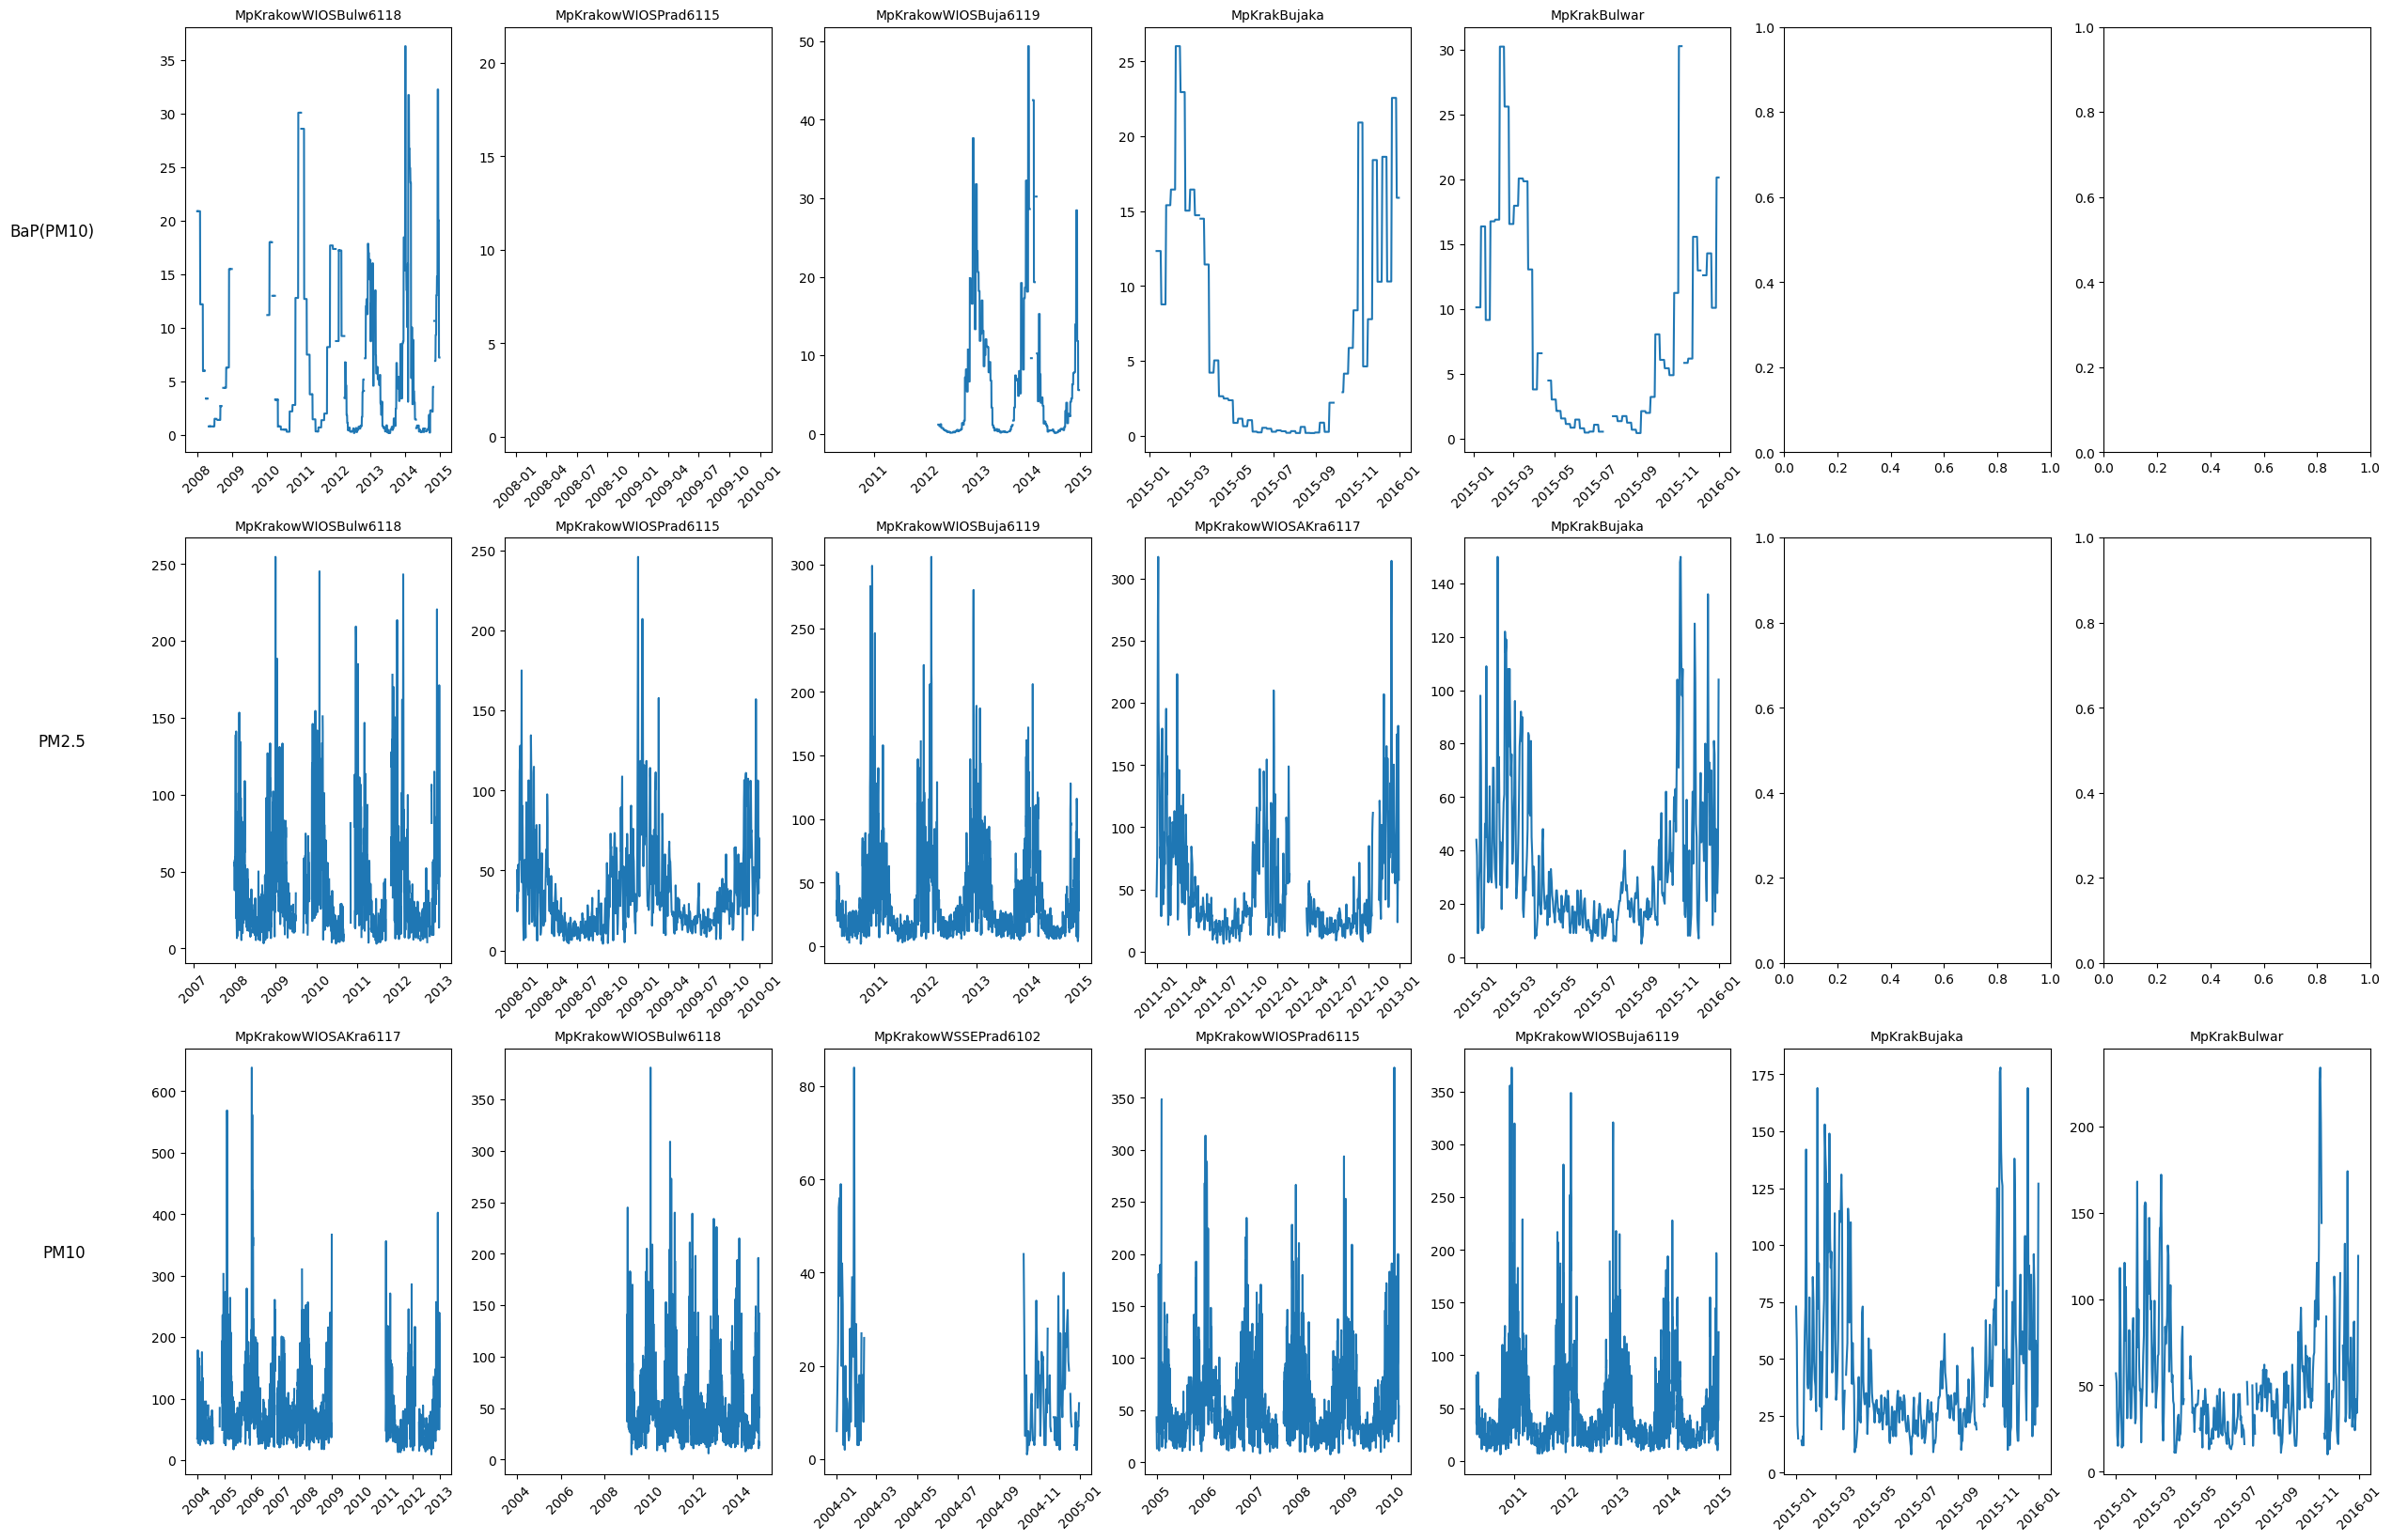

In [47]:
fig, axs = plt.subplots(3, 7, figsize=(30, 20))
for r, p in enumerate(parameters):
    for i in range(0, 7):
        if i >= dfs2016[p].shape[1]:
            break
        axs[r][i].plot(dfs2016[p].iloc[:,i])
        axs[r][i].set_title(dfs2016[p].columns[i], fontsize=10)
        axs[r][i].tick_params(axis='x', labelrotation=45) 
    axs[r][0].set_ylabel(p, fontsize=12, rotation=0, labelpad=50, ha='right')
plt.show()
#display(dfs2015)

C:\Users\PC\git\AI\PredykcjaSmogu\.venv\Lib\site-packages\pandas\plotting\_matplotlib\core.py:981: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  return ax.plot(*args, **kwds)
C:\Users\PC\git\AI\PredykcjaSmogu\.venv\Lib\site-packages\pandas\plotting\_matplotlib\core.py:981: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  return ax.plot(*args, **kwds)


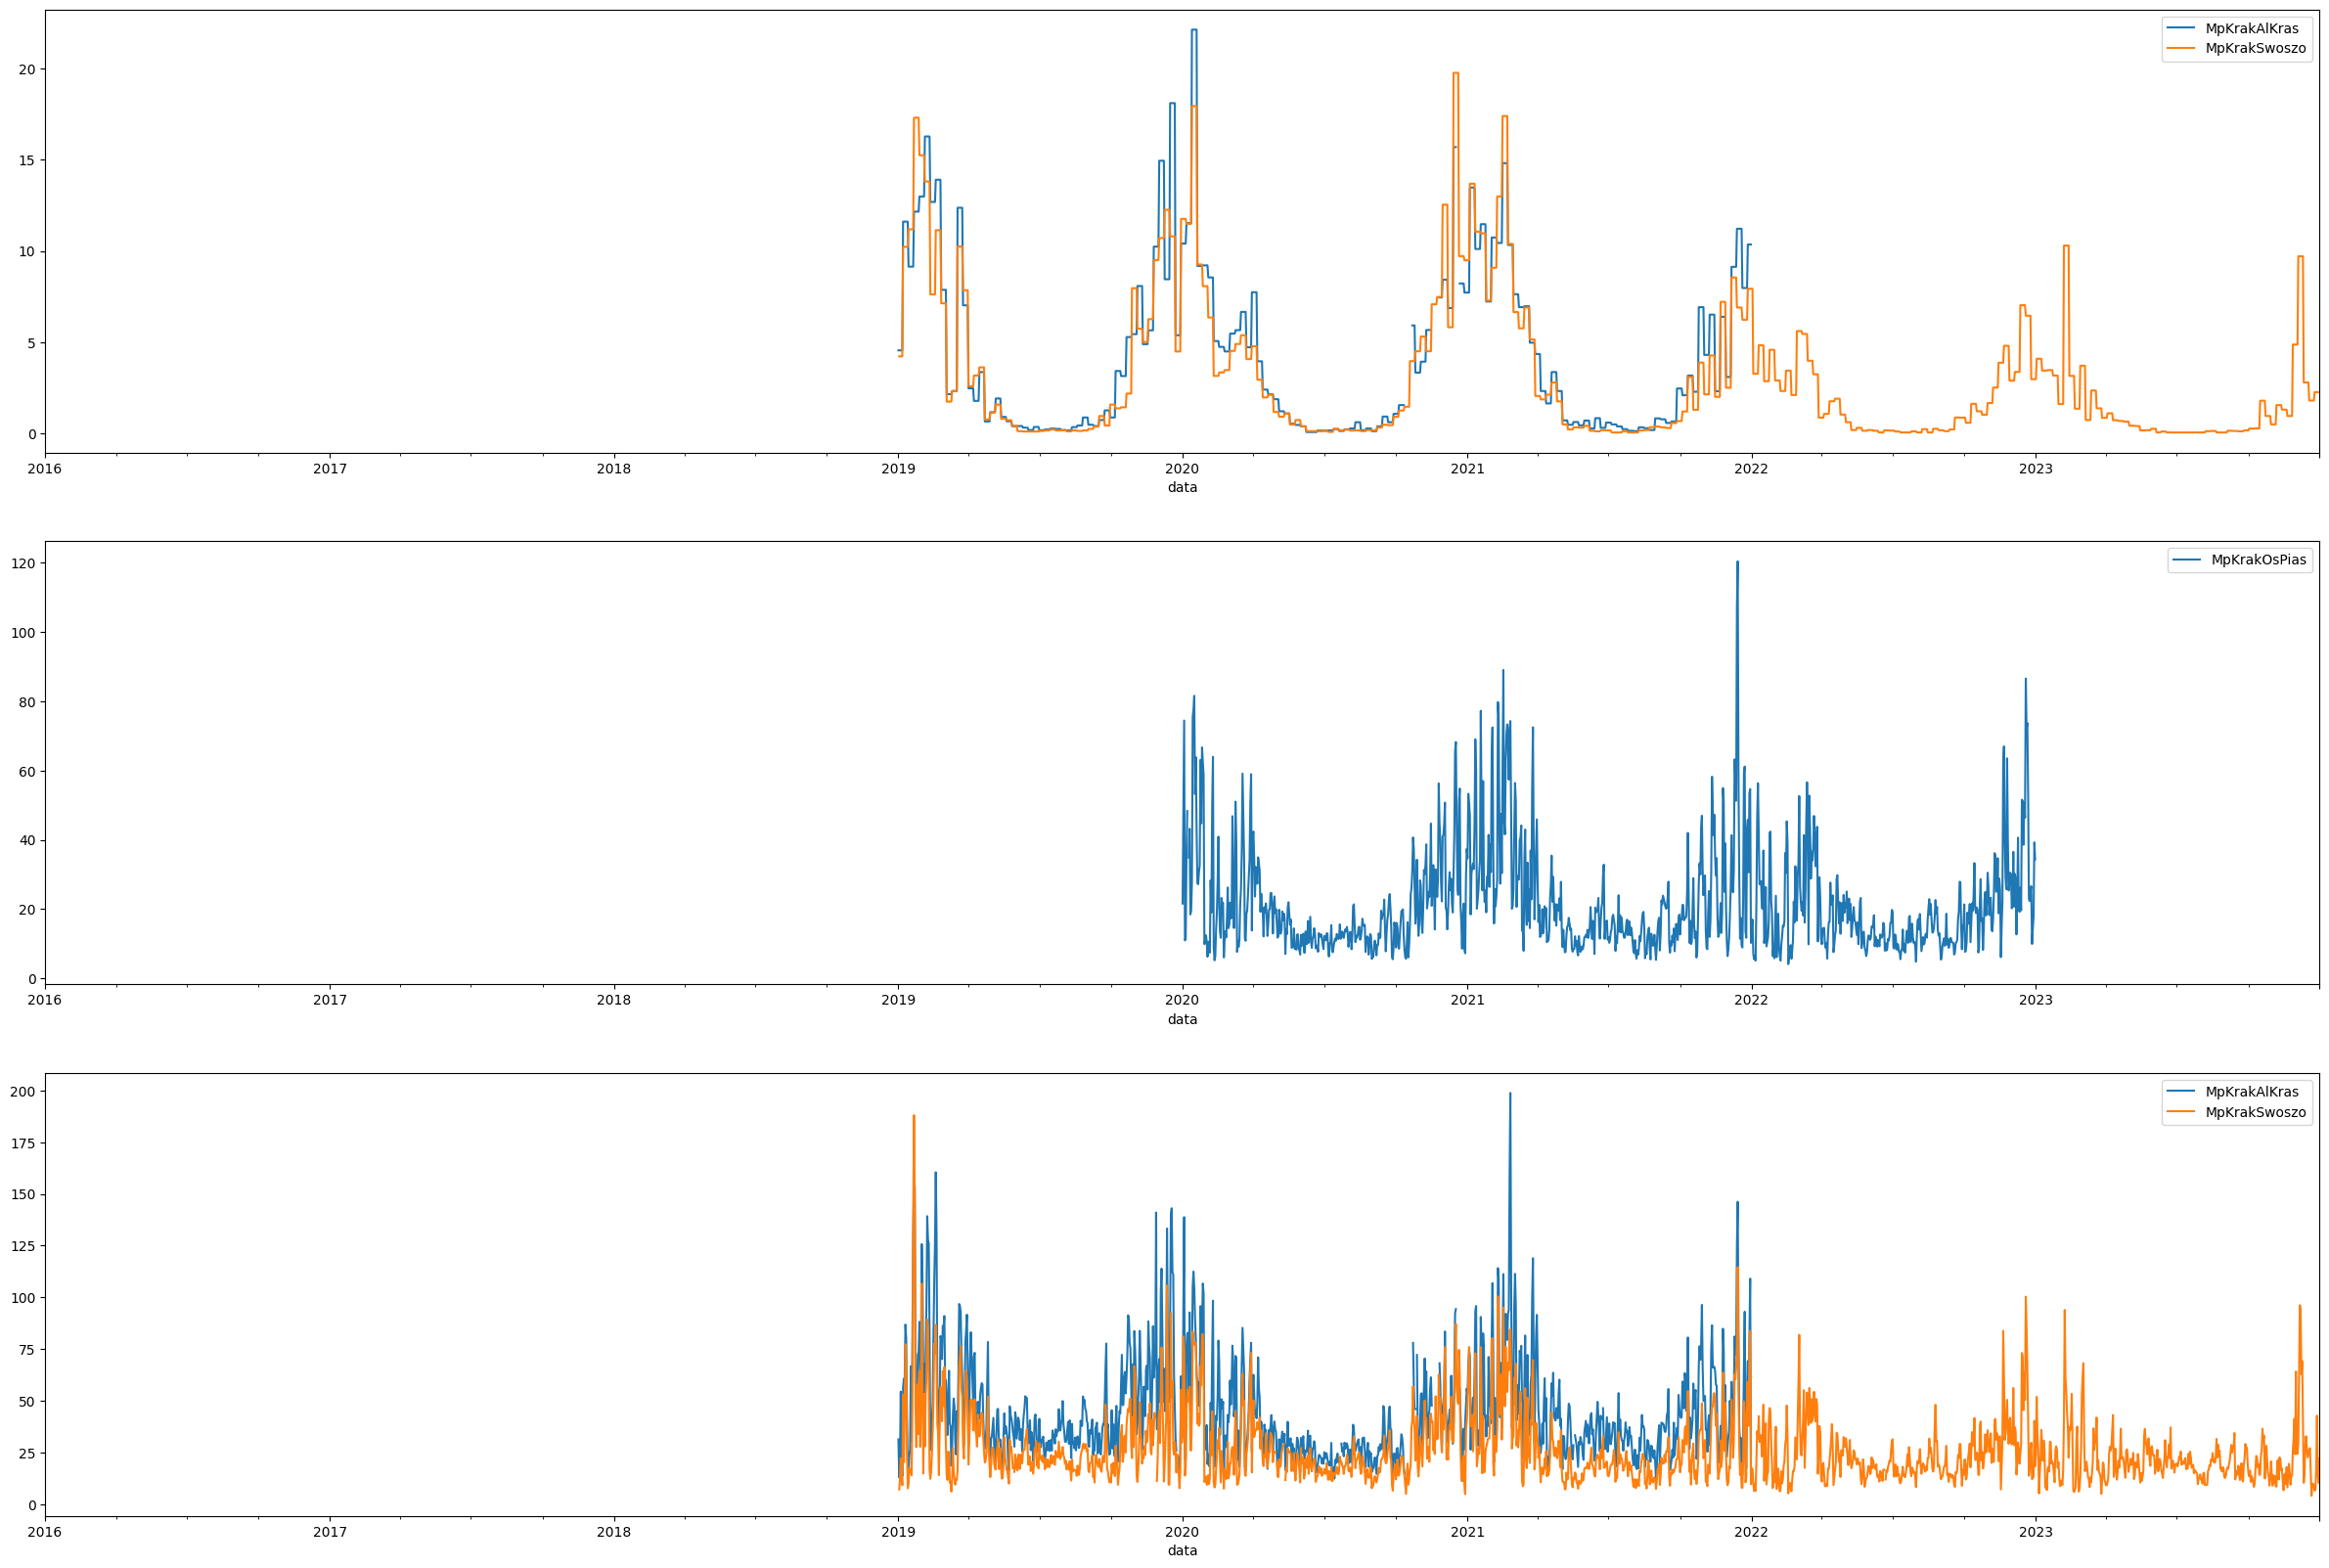

In [67]:
# fig, axs = plt.subplots(3, 1, figsize=(30, 20))
# for r, p in enumerate(parameters):
#     for i in range(0, 9):
#         if i >= dfs2024[p].shape[1]:
#             break
#         axs[r][i].plot(dfs2024[p].iloc[:,i])
#         axs[r][i].set_title(dfs2024[p].columns[i], fontsize=10)
#         axs[r][i].tick_params(axis='x', labelrotation=45) 
#     axs[r][0].set_ylabel(p, fontsize=12, rotation=0, labelpad=50, ha='right')
# plt.show() # :)))))))))))))))))))))))))
fig, axs = plt.subplots(3, 1, figsize=(30, 20))
for i, p in enumerate(parameters):
    dfs2024[p].plot(ax=axs[i])